In [9]:
import scipy.io
import numpy as np, h5py
import matplotlib.pyplot as plt
import copy
import pandas as pd
import pickle
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi']=150
rcParams['lines.linewidth']=1
rcParams['axes.grid']=True
rcParams['axes.facecolor']='#FFFFFF'
rcParams['font.size']=14
rcParams['patch.edgecolor']='none'

In [3]:
# fix random seed for reproducibility
seed = 8
np.random.seed(seed)

In [4]:
def readScan(scan):
    # We read the file saved in Matlab. There is only one variable in the file called scansMini
    data = h5py.File(scan, 'r')
    Xscans=data.get('scansMini')
    # We have to get the values into the right format (subjects, dim1, dim2, dim3, channels)
    X=copy.copy(Xscans.value)
    X=np.expand_dims(X,4)
    X1=np.rollaxis(X,3)
    return X1

In [5]:
X1=readScan('scansNormalizedFold1/scansMini1.mat')
X2=readScan('scansNormalizedFold1/scansMini2.mat')
X3=readScan('scansNormalizedFold1/scansMini3.mat')
X4=readScan('scansNormalizedFold1/scansMini4.mat')
X5=readScan('scansNormalizedFold1/scansMini5.mat')

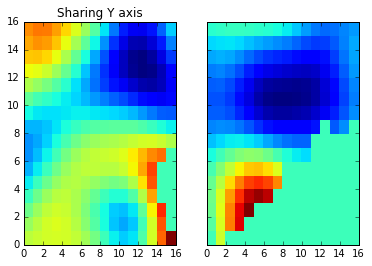

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pcolor((X1[10,:,:,0,0]))
ax1.set_title('Sharing Y axis')
ax2.pcolor((X2[10,:,:,0,0]))

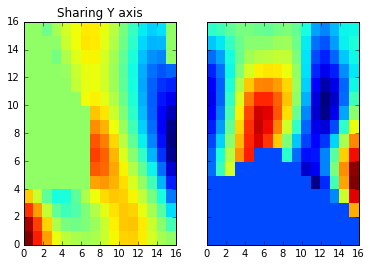

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pcolor((X3[80,:,:,0,0]))
ax1.set_title('Sharing Y axis')
ax2.pcolor((X4[80,:,:,0,0]))

In [11]:
names=pd.read_csv('scansNormalizedFold1/scanNames.csv')
namesDF=pd.DataFrame(names)

In [16]:
y=namesDF.label.values.astype(int)

In [34]:
X1.shape

(171, 16, 16, 16, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense, Flatten
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import time

Using TensorFlow backend.


In [18]:
from keras.layers import Merge

---

In [19]:
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(ysq)

In [ ]:
def baseline_model():
    model=Sequential()
    model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, init='uniform', activation='tanh'))
    model.add(Dense(1, init='uniform', activation='tanh'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=10, verbose=0)
kfold = KFold(n=len(X), n_folds=8, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, ysq, cv=kfold)
print results
print results.mean()

---

---

---

---

In [55]:
final_model.reset_states()
model1.reset_states()
model2.reset_states()
model3.reset_states()
model4.reset_states()
model5.reset_states()

In [56]:
model1=Sequential()
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model1.add(Flatten())
model1.add(Dense(20, init='glorot_normal', activation='tanh'))

In [57]:
model2=Sequential()
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model2.add(Flatten())
model2.add(Dense(20, init='glorot_normal', activation='tanh'))

In [58]:
model3=Sequential()
model3.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model3.add(Flatten())
model3.add(Dense(20, init='glorot_normal', activation='tanh'))

In [59]:
model4=Sequential()
model4.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model4.add(Flatten())
model4.add(Dense(20, init='glorot_normal', activation='tanh'))

In [60]:
model5=Sequential()
model5.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model5.add(Flatten())
model5.add(Dense(20, init='glorot_normal', activation='tanh'))

In [61]:
merged = Merge([model1, model2, model3, model4, model5], mode='concat')
final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, init='uniform', activation='tanh'))
final_model.add(Dense(1, init='uniform', activation='tanh'))
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# Fit the model
t0 = time.time()
history=final_model.fit([X1, X2, X3, X4, X5], y, validation_split=0.2, nb_epoch=100, batch_size=16,verbose=0)#callbacks=[callbacks]
t1 = time.time()
print (t1-t0)/60/60

3.52382746339


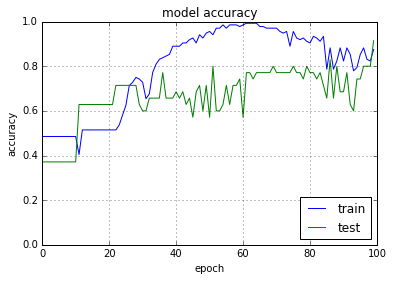

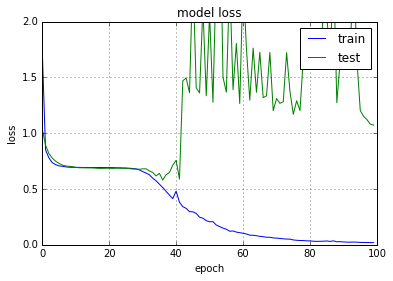

In [63]:
#draw_neural_net(fig.gca(), .1, .9, .1, .9, [numFeat, 1])
#summarize history for accuracy
fig=plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.ylim([0, 1])
plt.show()
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.ylim([0, 2])
plt.show()

In [64]:
final_model.save('m501a.h5')

In [65]:
X1test=readScan('scansTestFold1/fold1scansMini1Out.mat')
X2test=readScan('scansTestFold1/fold1scansMini2Out.mat')
X3test=readScan('scansTestFold1/fold1scansMini3Out.mat')
X4test=readScan('scansTestFold1/fold1scansMini4Out.mat')
X5test=readScan('scansTestFold1/fold1scansMini5Out.mat')

In [66]:
y_pred=final_model.predict([X1test, X2test, X3test, X4test, X5test])

In [73]:
y_predC=final_model.predict_classes([X1test, X2test, X3test, X4test, X5test])
y_predC=np.squeeze(y_predC)

41/41 [==============================] - 3s     


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

In [76]:
namesTest=pd.read_csv('scansTestFold1/scansNamesTestFold1.csv')
namesTestDF=pd.DataFrame(namesTest)
y_true=namesTestDF.label.values.astype(int)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score

In [80]:
print accuracy_score(y_true,y_predC)
confusion_matrix(y_true,y_predC)

0.829268292683


array([[13,  6],
       [ 1, 21]])

---

### Model 18 demean data -> Model501
model1=Sequential()   
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model1.add(Flatten())   
model1.add(Dense(20, init='glorot_normal', activation='tanh'))   

model2=Sequential()   
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model2.add(Flatten())   
model2.add(Dense(20, init='glorot_normal', activation='tanh'))   

model3=Sequential()   
model3.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model3.add(Flatten())   
model3.add(Dense(20, init='glorot_normal', activation='tanh'))   

model4=Sequential()   
model4.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model4.add(Flatten())   
model4.add(Dense(20, init='glorot_normal', activation='tanh'))   

model5=Sequential()   
model5.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model5.add(Flatten())   
model5.add(Dense(20, init='glorot_normal', activation='tanh'))   

merged = Merge([model1, model2, model3, model4, model5], mode='concat')   
final_model = Sequential()   
final_model.add(merged)   
final_model.add(Dense(10, init='uniform', activation='tanh'))   
final_model.add(Dense(1, init='uniform', activation='tanh'))   
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

history=final_model.fit([X1, X2, X3, X4, X5], y, validation_split=0.2, nb_epoch=100, batch_size=16,verbose=0)#callbacks=[callbacks]